In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, Bidirectional, SimpleRNN
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../datasets/TCS.csv")
df = df.set_index(df.columns[0])
closing_prices = df.iloc[0, 1:].values.astype(float)

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices.reshape(-1, 1))

In [5]:
def create_dataset(df, look_back=10):
    X, Y = [], []
    for i in range(len(df) - look_back):
        X.append(df[i:i + look_back, 0])
        Y.append(df[i + look_back, 0])
    return np.array(X), np.array(Y)

In [6]:
look_back = 20
X, Y = create_dataset(closing_prices_scaled, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [8]:
def build_lstm_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [9]:
def build_gru_model():
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(look_back, 1)))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [10]:
def build_bi_lstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(look_back, 1)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(50, return_sequences=False)))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [11]:
def build_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(50, return_sequences=True, input_shape=(look_back, 1)))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [12]:
lstm_model = build_lstm_model()
lstm_model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

gru_model = build_gru_model()
gru_model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

bi_lstm_model = build_bi_lstm_model()
bi_lstm_model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

rnn_model = build_rnn_model()
rnn_model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
48/48 - 4s - loss: 0.0278 - 4s/epoch - 93ms/step
Epoch 2/100
48/48 - 0s - loss: 0.0052 - 460ms/epoch - 10ms/step
Epoch 3/100
48/48 - 1s - loss: 0.0041 - 574ms/epoch - 12ms/step
Epoch 4/100
48/48 - 1s - loss: 0.0071 - 565ms/epoch - 12ms/step
Epoch 5/100
48/48 - 1s - loss: 0.0048 - 536ms/epoch - 11ms/step
Epoch 6/100
48/48 - 1s - loss: 0.0054 - 550ms/epoch - 11ms/step
Epoch 7/100
48/48 - 1s - loss: 0.0054 - 522ms/epoch - 11ms/step
Epoch 8/100
48/48 - 0s - loss: 0.0061 - 490ms/epoch - 10ms/step
Epoch 9/100
48/48 - 1s - loss: 0.0048 - 593ms/epoch - 12ms/step
Epoch 10/100
48/48 - 1s - loss: 0.0055 - 559ms/epoch - 12ms/step
Epoch 11/100
48/48 - 0s - loss: 0.0061 - 475ms/epoch - 10ms/step
Epoch 12/100
48/48 - 1s - loss: 0.0049 - 557ms/epoch - 12ms/step
Epoch 13/100
48/48 - 1s - loss: 0.0044 - 502ms/epoch - 10ms/step
Epoch 14/100
48/48 - 1s - loss: 0.0048 - 505ms/epoch - 11ms/step
Epoch 15/100
48/48 - 1s - loss: 0.0062 - 508ms/epoch - 11ms/step
Epoch 16/100
48/48 - 1s - loss: 0.006

In [13]:
def evaluate_model(model, X_test, Y_test):
    predicted_scaled = model.predict(X_test)
    predicted = scaler.inverse_transform(predicted_scaled)
    actual = scaler.inverse_transform(closing_prices_scaled[len(closing_prices_scaled) - len(Y_test):])
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    return mse, mae, r2, predicted, actual

In [16]:
lstm_metrics = evaluate_model(lstm_model, X_test, Y_test)
gru_metrics = evaluate_model(gru_model, X_test, Y_test)
bi_lstm_metrics = evaluate_model(bi_lstm_model, X_test, Y_test)
rnn_metrics = evaluate_model(rnn_model, X_test, Y_test)

# Print metrics
print("LSTM Metrics")
print(f"MSE: {lstm_metrics[0]}")
print(f"MAE: {lstm_metrics[1]}")
print(f"R-squared: {lstm_metrics[2]}")
# print(f"Predicted: {lstm_metrics[3]}")
# print(f"Actual: {lstm_metrics[4]}")

print("GRU Metrics")
print(f"MSE: {gru_metrics[0]}")
print(f"MAE: {gru_metrics[1]}")
print(f"R-squared: {gru_metrics[2]}")
# print(f"Predicted: {lstm_metrics[3]}")
# print(f"Actual: {lstm_metrics[4]}")

print("Bi-LSTM Metrics")
print(f"MSE: {bi_lstm_metrics[0]}")
print(f"MAE: {bi_lstm_metrics[1]}")
print(f"R-squared: {bi_lstm_metrics[2]}")
# print(f"Predicted: {bi_lstm_metrics[3]}")
# print(f"Actual: {bi_lstm_metrics[4]}")

print("RNN Metrics")
print(f"MSE: {rnn_metrics[0]}")
print(f"MAE: {rnn_metrics[1]}")
print(f"R-squared: {rnn_metrics[2]}")
# print(f"Predicted: {rnn_metrics[3]}")
# print(f"Actual: {rnn_metrics[4]}")

1/1 [==============================] - 0s 31ms/step
LSTM Metrics
MSE: 2337958.1255609165
MAE: 1221.323955829327
R-squared: -26.98458594381844
GRU Metrics
MSE: 190790.23872712022
MAE: 388.1471604567308
R-squared: -1.2836960912718531
Bi-LSTM Metrics
MSE: 952704.4271451416
MAE: 835.7628455528846
R-squared: -10.403557073590909
RNN Metrics
MSE: 158192.91071923875
MAE: 338.0214092548077
R-squared: -0.893516850163101


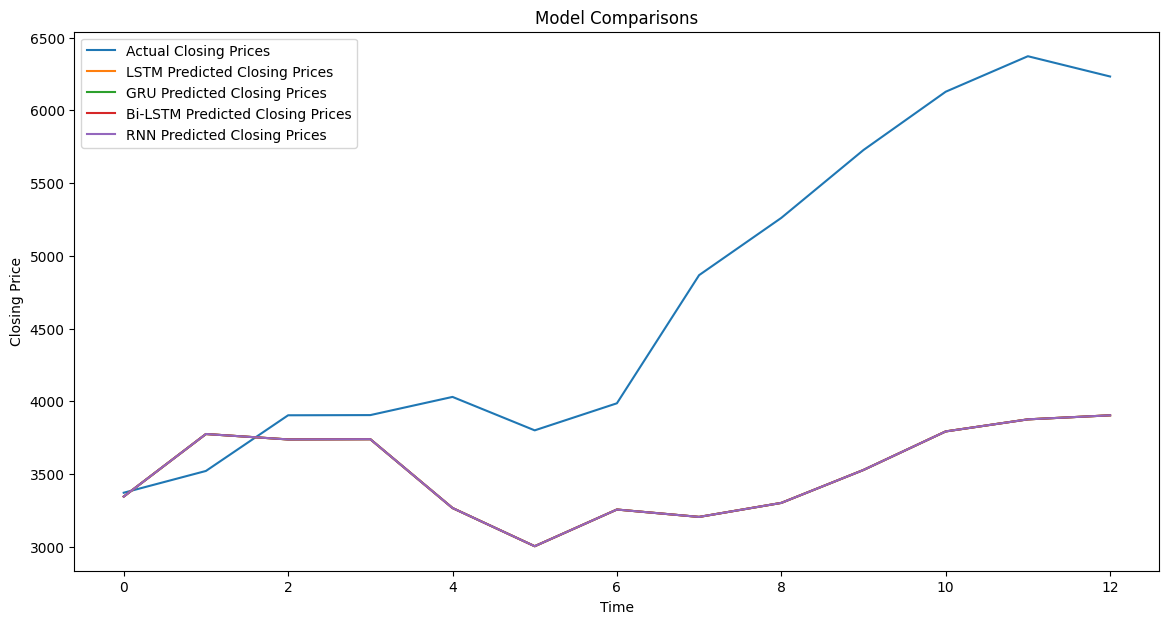

In [15]:
def plot_results(actual, lstm_pred, gru_pred, bi_lstm_pred, rnn_pred):
    plt.figure(figsize=(14, 7))
    plt.plot(actual, label='Actual Closing Prices')
    plt.plot(lstm_pred, label='LSTM Predicted Closing Prices')
    plt.plot(gru_pred, label='GRU Predicted Closing Prices')
    plt.plot(bi_lstm_pred, label='Bi-LSTM Predicted Closing Prices')
    plt.plot(rnn_pred, label='RNN Predicted Closing Prices')
    plt.xlabel('Time')
    plt.ylabel('Closing Price')
    plt.title('Model Comparisons')
    plt.legend()
    plt.show()

plot_results(lstm_metrics[3], lstm_metrics[4], gru_metrics[4], bi_lstm_metrics[4], rnn_metrics[4])